# A. ETS 모델

### 이동 평균 평활화
- 차수 m의 이동 평균 평활화
    - $\bar{y}_t = \frac{1}{m} \sum_{i=-k}^{k} y_{t+i}$, $k = (m-1)/2$
- 차수 m의 가중 평균 평활화
    - $\bar{y}_t = \sum_{i=-k}^{k} w_i y_{t+i}$, $k = (m-1)/2$
- 예측 방정식: $\hat{y}_{T+h|T} = \bar{y}_T$

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action='ignore')

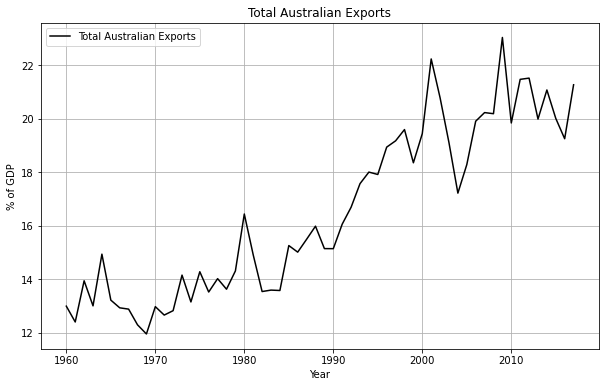

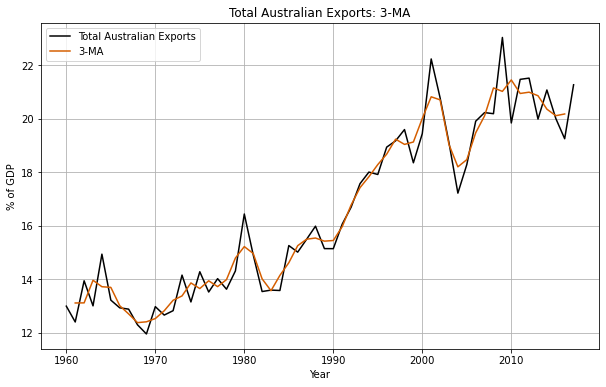

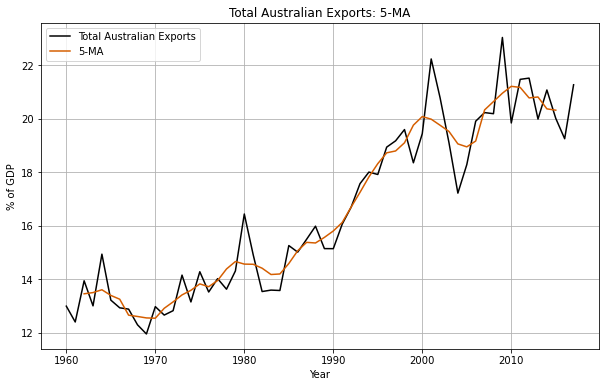

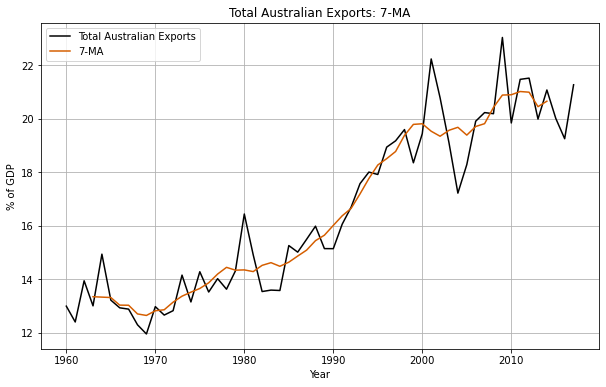

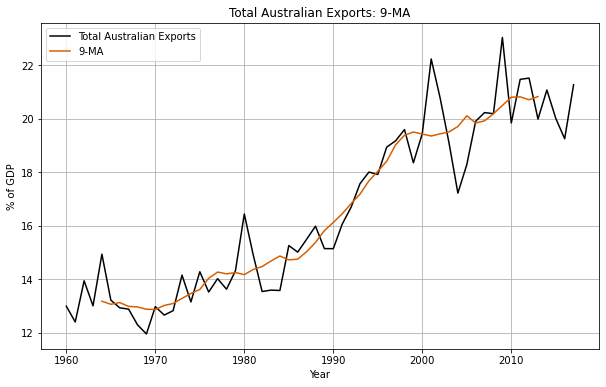

In [ ]:
global_economy = pd.read_csv('global_economy.csv')
global_economy['Year'] = pd.to_datetime(global_economy['Year'], format='%Y')

australia_exports = global_economy[global_economy['Country'] == 'Australia']
plt.figure(figsize=(10, 6))
plt.plot(australia_exports['Year'], australia_exports['Exports'], label='Total Australian Exports', color='black')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Total Australian Exports')
plt.grid(True)
plt.legend()
plt.show()

australia_exports['3-MA'] = australia_exports['Exports'].rolling(window=3, center=True).mean()
australia_exports['5-MA'] = australia_exports['Exports'].rolling(window=5, center=True).mean()
australia_exports['7-MA'] = australia_exports['Exports'].rolling(window=7, center=True).mean()
australia_exports['9-MA'] = australia_exports['Exports'].rolling(window=9, center=True).mean()

plt.figure(figsize=(10, 6))
plt.plot(australia_exports['Year'], australia_exports['Exports'], label='Total Australian Exports', color='black')
plt.plot(australia_exports['Year'], australia_exports['3-MA'], label='3-MA', color='#D55E00')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Total Australian Exports: 3-MA')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(australia_exports['Year'], australia_exports['Exports'], label='Total Australian Exports', color='black')
plt.plot(australia_exports['Year'], australia_exports['5-MA'], label='5-MA', color='#D55E00')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Total Australian Exports: 5-MA')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(australia_exports['Year'], australia_exports['Exports'], label='Total Australian Exports', color='black')
plt.plot(australia_exports['Year'], australia_exports['7-MA'], label='7-MA', color='#D55E00')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Total Australian Exports: 7-MA')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(australia_exports['Year'], australia_exports['Exports'], label='Total Australian Exports', color='black')
plt.plot(australia_exports['Year'], australia_exports['9-MA'], label='9-MA', color='#D55E00')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Total Australian Exports: 9-MA')
plt.grid(True)
plt.legend()
plt.show()

### 단순 지수 평활화
- 단순 지수 평활화(SES)
    - 트렌드나 계절적인 패턴이 명확하지 않은 데이터를 예측하기에 적합한 모델이다.
    - 과거의 관측보다 최근의 관측에 더 큰 가중치를 부여한다.
    - 가중치 평균 형식(Weighted average form)  
        $\hat{y}_{t+1|t} = \alpha y_t + (1-\alpha)\hat{y}_{t|t-1}$, $t=1,...,T$  
        $\hat{y}_{T+1|T} = \alpha (1-\alpha) y_{T-1} + \alpha(1-\alpha)^2 y_{T-1}+...+(1-\alpha)^T y_1$
- 구성 요소 형식(Component form)
    - 예측 방정식: $\hat{y}_{t+h|t} = l_t$, $h=1,2,3,...$
    - 평활 방정식(오차 수정):  
        $l_t = \alpha y_t +(1-\alpha)l_{t-1}$, $\alpha\in[0,1]$, $t=2,...,T$  
        $=l_{t-1}+\alpha(y_t - l_{t-1})$, $l_{t-1}$: 직전 예측, $y_t - l_{t-1}$: 직전 예측의 오차

In [ ]:
algeria_exports = global_economy[global_economy['Country'] == 'Algeria']

def simple_exponential_smoothing(data, alpha=0, l_zero=0):
    level = [l_zero]
    for i in data:
        l_t = alpha * i + (1 - alpha) * level[-1]
        level.append(l_t)
    return level

observation = algeria_exports[['Year', 'Exports']]
ses = simple_exponential_smoothing(algeria_exports['Exports'], alpha=0.84, l_zero=39.54)
level = pd.DataFrame({'Year Time': pd.date_range(start='1959', end='2017', freq='YS'), 'Level': ses})
forecast = pd.DataFrame({'Year Time': pd.date_range(start='1960', end='2022', freq='YS'), 'Forecast': ses+[ses[-1]]+[ses[-1]]+[ses[-1]]+[ses[-1]]})
algeria_SES = pd.merge(level, observation, left_on='Year Time', right_on='Year', how='outer')[['Year Time','Exports','Level']]
algeria_SES = pd.merge(algeria_SES, forecast, left_on='Year Time', right_on='Year Time', how='outer')

algeria_SES.iloc[0:9,:]

,Year Time,Exports,Level,Forecast
0,1959-01-01,NaN,39.540000,NaN
1,1960-01-01,39.043173,39.122665,39.540000
2,1961-01-01,46.244557,45.105054,39.122665
3,1962-01-01,19.793873,23.843662,45.105054
4,1963-01-01,24.684682,24.550119,23.843662
5,1964-01-01,25.084059,24.998628,24.550119
6,1965-01-01,22.603944,22.987093,24.998628
7,1966-01-01,25.986198,25.506341,22.987093
8,1967-01-01,23.434417,23.765925,25.506341


In [ ]:
algeria_SES.iloc[55:,:]

,Year Time,Exports,Level,Forecast
55,2014-01-01,30.219117,30.799298,33.845243
56,2015-01-01,23.171778,24.392181,30.799298
57,2016-01-01,20.860011,21.425158,24.392181
58,2017-01-01,22.638887,22.444690,21.425158
59,2018-01-01,NaN,NaN,22.444690
60,2019-01-01,NaN,NaN,22.444690
61,2020-01-01,NaN,NaN,22.444690
62,2021-01-01,NaN,NaN,22.444690
63,2022-01-01,NaN,NaN,22.444690


### 지수 평활화 알고리즘
- 지수 평활화(ETS)
    - 이 모델은 모든 이전 값의 가중 평균을 사용하여 다음 값을 예측하며, 가중치는 가장 최근 값부터 가장 오래된 과거 값까지 지수적으로 감소한다.
    - 예측 방정식: $\hat{y}_{t+h|t}=l_t$, $h=1,2,3,...$
    - 수준(level) 방정식: $l_t = l_{t-1}+\alpha(y_t -l_{t-1})=\alpha y_t +(1-\alpha)l_{t-1}$, $\alpha\in[0,1]$, $t=2,...,T$, $l_1 =y_1$
    - 일정 예측: 모든 예측은 동일한 값으로 설정되며, 이 값은 마지막 수준과 동일하다. $\hat{y}_{T+h|T}=l_T$
    - 두 가지 큰 단점: 데이터에 트렌드나 계절적 변동이 나타날 때 사용할 수 없다.

C:\Users\YJPark\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


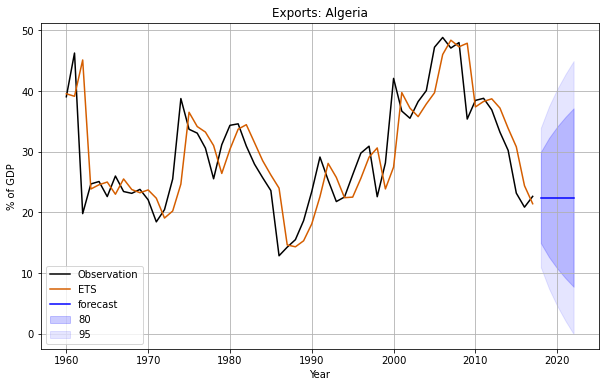

In [ ]:
algeria_series = pd.Series(list(observation['Exports']), observation['Year'])
fit = ETSModel(algeria_series).fit()
forecast = fit.forecast(5)
ci = fit.get_prediction(start = forecast.index[0], end = forecast.index[-1])
lower_ci80 = ci.pred_int(alpha=0.2).iloc[:,0]
upper_ci80 = ci.pred_int(alpha=0.2).iloc[:,1]
lower_ci95 = ci.pred_int(alpha=0.05).iloc[:,0]
upper_ci95 = ci.pred_int(alpha=0.05).iloc[:,1]

plt.figure(figsize=(10, 6))
plt.plot(algeria_series, label='Observation', color='black')
plt.plot(fit.fittedvalues, label='ETS', color='#D55E00')
plt.plot(forecast, label='forecast', color='b')
plt.fill_between(forecast.index, lower_ci80, upper_ci80, label='80', color='b', alpha=.2)
plt.fill_between(forecast.index, lower_ci95, upper_ci95, label='95', color='b', alpha=.1)
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Exports: Algeria')
plt.grid(True)
plt.legend()
plt.show()

### Holt-Winters 지수 평활화: 추세
- Holt 선형 추세법
    - 예측 방정식: $\hat{y}_{t+h|t}=l_t +hb_t$, $h=1,2,3,...$
    - 수준 방정식: $l_t=\alpha y_t +(1-\alpha)(l_{t-1}+b_{t-1})$, $\alpha\in[0,1]$, $t=2,...,T$, $l_1=y_1$
        - $y_t$ 관측값과 한 단계 직전에 학습된 예측값($l_{t-1}+b_{t-1}$)의 가중치 평균
    - 추세 방정식(기울기): $b_t=\beta^* (l_t -l_{t-1})+(1-\beta^*)b_{t-1}$, $\beta^*\in[0,1]$
        - 현재 측정된 추세($l_t -l_{t-1}$)와 한 단계 직전에 학습된 추세($b_{t-1}$)의 가중치 평균
- Holt 감쇠 추세법 [Gardner & McKenzie, 1985]
    - 예측 방정식: $\hat{y}_{t+h|t}=l_t +(\phi+\phi^2+...+\phi^h )b_t$
    - 수준 방정식: $l_t=\alpha y_t +(1-\alpha)(l_{t-1}+\phi b_{t-1})$, $\alpha$,$\phi\in[0,1]$, $t=2,...,T$, $l_1=y_1$
    - 추세 방정식: $b_t=\beta^* (l_t -l_{t-1})+(1-\beta^*)\phi b_{t-1}$, $\beta^*\in[0,1]$
    - $h\rightarrow \infty $, $\hat{y}_{T+1|T}\rightarrow l_T + \phi b_T /(1-\phi)$
    - 단기 예측은 추세가 있는 반면, 장기 예측은 일정하다.

C:\Users\YJPark\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\YJPark\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


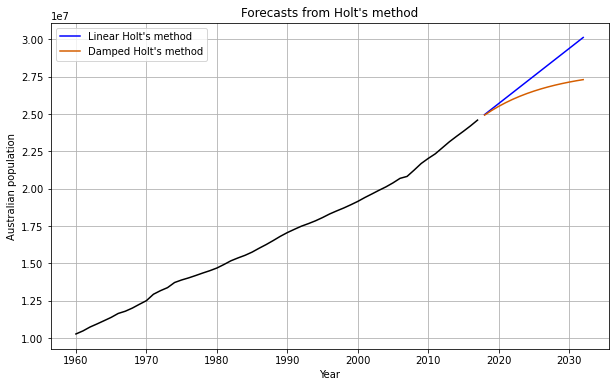

C:\Users\YJPark\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\YJPark\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\YJPark\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\YJPark\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is 

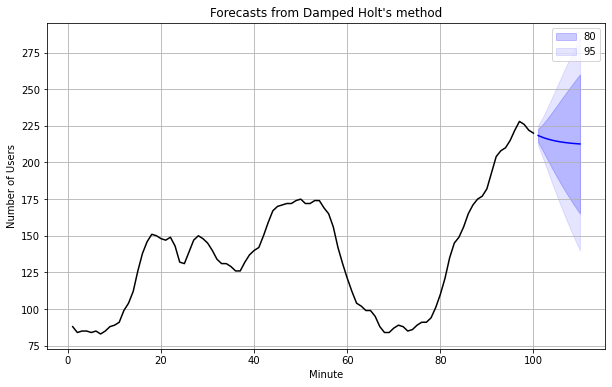

In [ ]:
australia_economy = global_economy[global_economy['Country'] == 'Australia']
australia_pop = australia_economy[['Population', 'Year']]

pop_series = pd.Series(list(australia_pop['Population']), australia_pop['Year'])
fit_pop1 = ETSModel(pop_series, trend='add').fit()
fit_pop2 = ETSModel(pop_series, trend='add', damped_trend=True).fit_constrained({"damping_trend": 0.9})
forecast_pop1 = fit_pop1.forecast(15)
forecast_pop2 = fit_pop2.forecast(15)

plt.figure(figsize=(10, 6))
plt.plot(pop_series,  color='black')
plt.plot(forecast_pop1, label='Linear Holt\'s method', color='b')
plt.plot(forecast_pop2, label='Damped Holt\'s method', color='#D55E00')
plt.xlabel('Year')
plt.ylabel('Australian population')
plt.title('Forecasts from Holt\'s method')
plt.grid(True)
plt.legend()
plt.show()

www_usage = pd.read_csv('WWWusage.csv')
www_series = pd.Series(list(map(float,www_usage['value'])), www_usage['time'])

fit_www = ETSModel(www_series, trend='add', damped_trend=True).fit()
forecast_www = fit_www.forecast(10)
ci = fit_www.get_prediction(start = forecast_www.index[0], end = forecast_www.index[-1])
lower_ci80 = ci.pred_int(alpha=0.2).iloc[:,0]
upper_ci80 = ci.pred_int(alpha=0.2).iloc[:,1]
lower_ci95 = ci.pred_int(alpha=0.05).iloc[:,0]
upper_ci95 = ci.pred_int(alpha=0.05).iloc[:,1]

plt.figure(figsize=(10, 6))
plt.plot(www_series, color='black')
plt.plot(forecast_www.index+1, forecast_www.values, color='b')
plt.fill_between(forecast_www.index+1, lower_ci80, upper_ci80, label='80', color='b', alpha=.2)
plt.fill_between(forecast_www.index+1, lower_ci95, upper_ci95, label='95', color='b', alpha=.1)
plt.xlabel('Minute')
plt.ylabel('Number of Users')
plt.title('Forecasts from Damped Holt\'s method')
plt.grid(True)
plt.legend()
plt.show()

### Holt-Winters 지수 평활화: 계절성
- Holt-Winters 가산법
    - 홀트-윈터스 평활법은 간단한 ETS 기법의 두 가지 단점을 해결하여 추세와 계절성이 모두 존재할 때 사용할 수 있도록 한다.
    - 예측 방정식: $\hat{y}_{t+h|t}=l_t +hb_t +s_{t+h-m(k+1)}$, $h=1,2,3,...$
        - $k$는 $(h-1)/m$의 정수 부분으로, 이는 예측에 사용되는 계절 지수의 추정치가 표본의 마지막 연도에서 나온다는 것을 보장합니다.
    - 수준 방정식: $l_t=\alpha (y_t -s_{t-m})+(1-\alpha)(l_{t-1}+b_{t-1})$, $\alpha\in[0,1]$, $t=2,...,T$
    - 추세 방정식: $b_t=\beta^* (l_t -l_{t-1})+(1-\beta^*)b_{t-1}$, $\beta^*\in[0,1]$
    - 계절성 방정식: $s_t =\gamma(y_t -l_{t-1}-b_{t-1})+(1-\gamma)s_{t-m}$, $\gamma\in[0,1]$, $t=2,...T$
        - 현재 계절 지수($y_t -l_{t-1}-b_{t-1}$)와 동일한 계절의 작년 계절 지수(i.e., $m$ 시점 이전)의 가중 평균이다.

### Holt-Winters 지수 평활화
- Holt-Winters 승산법
    - 수준 방정식: $l_t=\alpha \frac{y_t}{s_{t-m}}+(1-\alpha)(l_{t-1}+b_{t-1})$, $\alpha\in[0,1]$, $t=2,...,T$
    - 추세 방정식: $b_t=\beta^* (l_t -l_{t-1})+(1-\beta^*)b_{t-1}$, $\beta^*\in[0,1]$
    - 계절성 방정식: $s_t =\gamma\frac{y_t}{l_{t-1}+b_{t-1}}+(1-\gamma)s_{t-m}$, $\gamma\in[0,1]$, $t=2,...T$
    - 예측 방정식: $\hat{y}_{t+h|t}=(l_t +hb_t)s_{t+h-m(k+1)}$

- 감쇠 추세와 승산 계절성을 갖는 Holt-Winters 방법
    - 수준 방정식: $l_t=\alpha \frac{y_t}{s_{t-m}}+(1-\alpha)(l_{t-1}+\phi b_{t-1})$, $\alpha\in[0,1]$, $t=2,...,T$
    - 추세 방정식: $b_t=\beta^* (l_t -l_{t-1})+(1-\beta^*)\phi b_{t-1}$, $\beta^*\in[0,1]$
    - 계절성 방정식: $s_t =\gamma\frac{y_t}{l_{t-1}+\phi b_{t-1}}+(1-\gamma)s_{t-m}$, $\gamma\in[0,1]$, $t=2,...T$
    - 예측 방정식: $\hat{y}_{t+h|t}=(l_t +\phi_h b_t)s_{t+h-m(k+1)}$

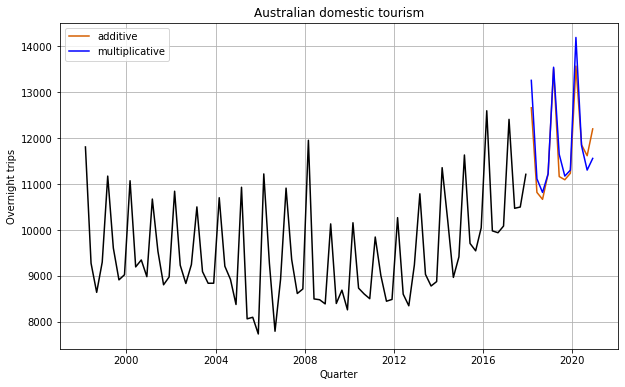

AAA: alpha = 0.08623119916780364, beta = 0.013207083627805045, gamma = 0.6862540906340292
MAM: alpha = 0.38301291714083624, beta = 0.017768906409460702, gamma = 6.169870828591637e-05


In [ ]:
tourism = pd.read_csv("tourism.csv")
tourism = tourism[tourism["Purpose"] == "Holiday"]
tourism = tourism[["Quarter", "Trips"]]
tourism = tourism.groupby("Quarter").sum()

tour_series = pd.Series(list(tourism['Trips']), pd.date_range(start='2/3/1998', periods=80, freq='3MS'))
fit_tour1 = ETSModel(tour_series, error='add', trend='add', seasonal='add').fit()
fit_tour2 = ETSModel(tour_series, error='mul', trend='add', seasonal='mul').fit()
forecast_tour1 = fit_tour1.forecast(12)
forecast_tour2 = fit_tour2.forecast(12)

plt.figure(figsize=(10, 6))
plt.plot(tour_series,  color='black')
plt.plot(forecast_tour1, label='additive', color='#D55E00')
plt.plot(forecast_tour2, label='multiplicative', color='b')
plt.xlabel('Quarter')
plt.ylabel('Overnight trips')
plt.title('Australian domestic tourism')
plt.grid(True)
plt.legend()
plt.show()

print(f"AAA: alpha = {fit_tour1.smoothing_level}, beta = {fit_tour1.smoothing_trend}, gamma = {fit_tour1.smoothing_seasonal}")
print(f"MAM: alpha = {fit_tour2.smoothing_level}, beta = {fit_tour2.smoothing_trend}, gamma = {fit_tour2.smoothing_seasonal}")

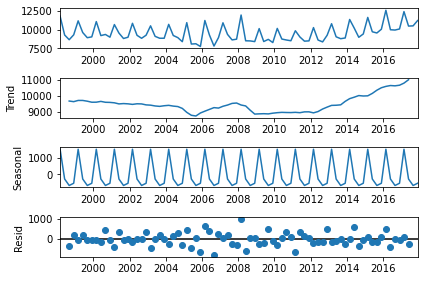

In [ ]:
decomposition = sm.tsa.seasonal_decompose(tour_series, model='additive')
fig = decomposition.plot()

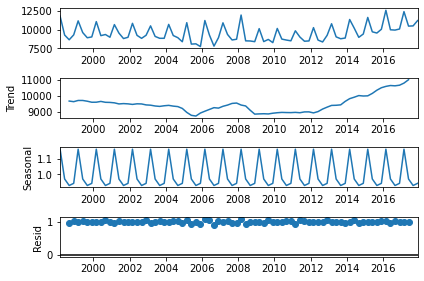

In [ ]:
decomposition = sm.tsa.seasonal_decompose(tour_series, model='multiplicative')
fig = decomposition.plot()

### ETS 모델에 대한 방법론 분류
- 지수 평활화 방법들(추세, 계절성)
    - 추세: $N$(없음), $A$(가산), $A_d$(가산 감쇠)
    - 계절성: $N$(없음), $A$(가산), $M$(승산)
- ($N$, $N$): 단순 지수 평활화  
$\hat{y}_{t+h|t}=l_t$  
$l_t =\alpha y_t +(1-\alpha)l_{t-1}$
- ($A$, $N$): Holt 선형 추세법  
$\hat{y}_{t+h|t}=l_t +hb_t$  
$l_t=\alpha y_t +(1-\alpha)(l_{t-1}+b_{t-1})$  
$b_t=\beta^* (l_t -l_{t-1})+(1-\beta^*)b_{t-1}$
- ($A_d$, $N$): 가산 감쇠 추세법  
$\hat{y}_{t+h|t}=l_t +\phi_h b_t$  
$l_t=\alpha y_t +(1-\alpha)(l_{t-1}+\phi b_{t-1})$  
$b_t=\beta^* (l_t -l_{t-1})+(1-\beta^*)\phi b_{t-1}$
- ($N$, $A$)  
$\hat{y}_{t+h|t}=l_t +s_{t+h-m(k+1)}$  
$l_t=\alpha (y_t -s_{t-m})+(1-\alpha)l_{t-1}$  
$s_t =\gamma(y_t -l_{t-1})+(1-\gamma)s_{t-m}$
- ($A$, $A$): Holt-Winters 가산법  
$\hat{y}_{t+h|t}=l_t +hb_t +s_{t+h-m(k+1)}$  
$l_t=\alpha (y_t -s_{t-m})+(1-\alpha)(l_{t-1}+b_{t-1})$  
$b_t=\beta^* (l_t -l_{t-1})+(1-\beta^*)b_{t-1}$  
$s_t =\gamma(y_t -l_{t-1}-b_{t-1})+(1-\gamma)s_{t-m}$
- ($A_d$, $A$)  
$\hat{y}_{t+h|t}=l_t +\phi_h b_t +s_{t+h-m(k+1)}$  
$l_t=\alpha (y_t -s_{t-m})+(1-\alpha)(l_{t-1}+\phi b_{t-1})$  
$b_t=\beta^* (l_t -l_{t-1})+(1-\beta^*)\phi b_{t-1}$  
$s_t =\gamma(y_t -l_{t-1}-\phi b_{t-1})+(1-\gamma)s_{t-m}$
- ($N$, $M$)  
$\hat{y}_{t+h|t}=l_t s_{t+h-m(k+1)}$  
$l_t=\alpha (y_t /s_{t-m})+(1-\alpha)l_{t-1}$  
$s_t =\gamma(y_t /l_{t-1})+(1-\gamma)s_{t-m}$
- ($A$, $M$): Holt-Winters 승산법  
$\hat{y}_{t+h|t}=(l_t +hb_t)s_{t+h-m(k+1)}$  
$l_t=\alpha (y_t /s_{t-m})+(1-\alpha)(l_{t-1}+b_{t-1})$  
$b_t=\beta^* (l_t -l_{t-1})+(1-\beta^*)b_{t-1}$  
$s_t =\gamma(y_t /(l_{t-1}+b_{t-1}))+(1-\gamma)s_{t-m}$
- ($A_d$, $M$): Holt-Winters 감쇠 승산법  
$\hat{y}_{t+h|t}=(l_t +\phi_h b_t)s_{t+h-m(k+1)}$  
$l_t=\alpha (y_t /s_{t-m})+(1-\alpha)(l_{t-1}+\phi b_{t-1})$  
$b_t=\beta^* (l_t -l_{t-1})+(1-\beta^*)\phi b_{t-1}$  
$s_t =\gamma(y_t /(l_{t-1}+\phi b_{t-1}))+(1-\gamma)s_{t-m}$

# B. ETS 모델에 대한 상태 공간 모델

### ETS 모델의 이노베이션 상태 공간 모델
- 방법
    - 시점 예측을 반환하는 알고리즘이다.
- ETS 프레임워크의 각 모델에 대한 상태 공간 방정식
    - 전과 동일하게 시점 예측을 생성하지만 예측 구간 또한 생성할 수 있다.
    - ETS(오차-Error, 추세-Trend, 계절성-Seasonal)
        - 오차: $A$(가산 오차), $M$(승산 오차)
        - 추세: $N$(없음), $A$(가산), $A_d$(가산 감쇠)
- ETS($A$, $N$, $N$): 가산 오차($A$)를 포함한 SES
    - 예측 오차: $\epsilon_t =y_t -\hat{y}_{t|t-1}=y_t-l_{t-1}\sim\mathcal{N}(0,\sigma^2)$
    - 측정 방정식: $y_t =l_{t-1}+\epsilon_t$
    - 상태 방정식: $l_t =\alpha y_t +(1-\alpha)l_{t-1}=l_{t-1}+\alpha(y_t -l_{t-1})=l_{t-1}+\alpha\epsilon_t$
        - "이노베이션" 또는 "단일 오류 소스"라고 하는 이유는 방정식이 동일한 오류 과정($\epsilon_t$)을 갖고 있기 때문이다.
        - 측정 방정식: 관측과 상태 사이의 관계
        - 상태 방정식: 시간에 따른 상태의 변화
- ETS($M$, $N$, $N$): 승산 오차($M$)를 포함한 SES
    - 상대 예측 오차: $\epsilon_t =(y_t -\hat{y}_{t|t-1})/\hat{y}_{t|t-1}=(y_t-l_{t-1})/\hat{y}_{t|t-1}\sim\mathcal{N}(0,\sigma^2)$
    - 측정 방정식: $y_t =l_{t-1}(1+\epsilon_t)$
    - 상태 방정식: $l_t =l_{t-1}(1+\alpha\epsilon_t )$
        - 동일한 매개변수를 가진 가산 및 승산 오차 모델은 동일한 시점 예측을 생성하지만 다른 예측 구간을 생성한다.
- ETS($A$, $A$, $N$): 가산 오차를 포함한 Holt 선형 추세법
    - 예측 오차: $\epsilon_t =y_t-l_{t-1}-b_{t-1}\sim\mathcal{N}(0,\sigma^2)$
    - 측정 방정식: $y_t =l_{t-1}+b_{t-1}+\epsilon_t$
    - 상태 방정식: $l_t =\alpha y_t +(1-\alpha)(l_{t-1}+b_{t-1})=l_{t-1}+b_{t-1}+\alpha(y_t -l_{t-1}-b_{t-1})=l_{t-1}+b_{t-1}+\alpha\epsilon_t$
    - 추세 방정식(기울기): $b_t=\beta^* (l_t -l_{t-1})+(1-\beta^*)b_{t-1}=b_{t-1}+\beta^*(l_t -l_{t-1}-b_{t-1})=b_{t-1}+\beta^*\alpha\epsilon_t$

### 가산 ETS 모델의 상태 공간 방정식
- ($N$, $N$)  
$y_t =l_{t-1}+\epsilon_t$  
$l_t =l_{t-1}+\alpha\epsilon_t$
- ($A$, $N$)  
$y_t =l_{t-1}+b_{t-1}+\epsilon_t$  
$l_t=l_{t-1}+b_{t-1}+\alpha\epsilon_t$  
$b_t=b_{t-1}+\beta\epsilon_t$
- ($A_d$, $N$)  
$y_t =l_{t-1}+\phi b_{t-1}+\epsilon_t$  
$l_t=l_{t-1}+\phi b_{t-1}+\alpha\epsilon_t$  
$b_t=\phi b_{t-1}+\beta\epsilon_t$
- ($N$, $A$)  
$y_t =l_{t-1}+s_{t-m}+\epsilon_t$  
$l_t =l_{t-1}+\alpha\epsilon_t$  
$s_t =s_{t-m}+\gamma\epsilon_t$
- ($A$, $A$)  
$y_t =l_{t-1}+b_{t-1}+s_{t-m}+\epsilon_t$  
$l_t =l_{t-1}+b_{t-1}+\alpha\epsilon_t$  
$b_t =b_{t-1}+\beta\epsilon_t$  
$s_t =s_{t-m}+\gamma\epsilon_t$
- ($A_d$, $A$)  
$y_t =l_{t-1}+\phi b_{t-1}+s_{t-m}+\epsilon_t$  
$l_t =l_{t-1}+\phi b_{t-1}+\alpha\epsilon_t$  
$b_t =\phi b_{t-1}+\beta\epsilon_t$  
$s_t =s_{t-m}+\gamma\epsilon_t$
- ($N$, $M$)  
$y_t =l_{t-1}s_{t-m}+\epsilon_t$  
$l_t =l_{t-1}+\alpha\epsilon_t/s_{t-m}$  
$s_t =s_{t-m}+\gamma\epsilon_t/l_{t-1}$
- ($A$, $M$)  
$y_t =(l_{t-1}+b_{t-1})s_{t-m}+\epsilon_t$  
$l_t =l_{t-1}+b_{t-1}+\alpha\epsilon_t/s_{t-m}$  
$b_t =b_{t-1}+\beta\epsilon_t/s_{t-m}$  
$s_t =s_{t-m}+\gamma\epsilon_t/(l_{t-1}+b_{t-1})$
- ($A_d$, $M$)  
$y_t =(l_{t-1}+\phi b_{t-1})s_{t-m}+\epsilon_t$  
$l_t =l_{t-1}+\phi b_{t-1}+\alpha\epsilon_t/s_{t-m}$  
$b_t =\phi b_{t-1}+\beta\epsilon_t/s_{t-m}$  
$s_t =s_{t-m}+\gamma\epsilon_t/(l_{t-1}+\phi b_{t-1})$

### 승산 ETS 모델의 상태 공간 방정식
- ($N$, $N$)  
$y_t =l_{t-1}(1+\epsilon_t)$  
$l_t =l_{t-1}(1+\alpha\epsilon_t)$
- ($A$, $N$)  
$y_t =(l_{t-1}+b_{t-1})(1+\epsilon_t)$  
$l_t=(l_{t-1}+b_{t-1})(1+\alpha\epsilon_t)$  
$b_t=b_{t-1}+\beta(l_{t-1}+b_{t-1})\epsilon_t$
- ($A_d$, $N$)  
$y_t =(l_{t-1}+\phi b_{t-1})(1+\epsilon_t)$  
$l_t=(l_{t-1}+\phi b_{t-1})(1+\alpha\epsilon_t)$  
$b_t=\phi b_{t-1}+\beta(l_{t-1}+\phi b_{t-1})\epsilon_t$
- ($N$, $A$)  
$y_t =(l_{t-1}+s_{t-m})(1+\epsilon_t)$  
$l_t =l_{t-1}+\alpha(l_{t-1}+s_{t-m})\epsilon_t$  
$s_t =s_{t-m}+\gamma(l_{t-1}+s_{t-m})\epsilon_t$
- ($A$, $A$)  
$y_t =(l_{t-1}+b_{t-1}+s_{t-m})(1+\epsilon_t)$  
$l_t =l_{t-1}+b_{t-1}+\alpha(l_{t-1}+b_{t-1}+s_{t-m})\epsilon_t$  
$b_t =b_{t-1}+\beta(l_{t-1}+b_{t-1}+s_{t-m})\epsilon_t$  
$s_t =s_{t-m}+\gamma(l_{t-1}+b_{t-1}+s_{t-m})\epsilon_t$
- ($A_d$, $A$)  
$y_t =(l_{t-1}+\phi b_{t-1}+s_{t-m})(1+\epsilon_t)$  
$l_t =l_{t-1}+\phi b_{t-1}+\alpha(l_{t-1}+\phi b_{t-1}+s_{t-m})\epsilon_t$  
$b_t =\phi b_{t-1}+\beta(l_{t-1}+\phi b_{t-1}+s_{t-m})\epsilon_t$  
$s_t =s_{t-m}+\gamma(l_{t-1}+\phi b_{t-1}+s_{t-m})\epsilon_t$
- ($N$, $M$)  
$y_t =l_{t-1}s_{t-m}(1+\epsilon_t)$  
$l_t =l_{t-1}(1+\alpha\epsilon_t)$  
$s_t =s_{t-m}(1+\gamma\epsilon_t)$
- ($A$, $M$)  
$y_t =(l_{t-1}+b_{t-1})s_{t-m}(1+\epsilon_t)$  
$l_t =(l_{t-1}+b_{t-1})(1+\alpha\epsilon_t)$  
$b_t =b_{t-1}+\beta(l_{t-1}+b_{t-1})\epsilon_t$  
$s_t =s_{t-m}(1+\gamma\epsilon_t)$
- ($A_d$, $M$)  
$y_t =(l_{t-1}+\phi b_{t-1})s_{t-m}(1+\epsilon_t)$  
$l_t =(l_{t-1}+\phi b_{t-1})(1+\alpha\epsilon_t)$  
$b_t =\phi b_{t-1}+\beta(l_{t-1}+\phi b_{t-1})\epsilon_t$  
$s_t =s_{t-m}(1+\gamma\epsilon_t)$

### ETS 모델을 통한 예측
- 예측 분산: $\sigma^2_h$
- ($A$, $N$, $N$): $\sigma^2_h=\sigma^2[1+\alpha^2(h-1)]$
- ($A$, $A$, $N$): $\sigma^2_h=\sigma^2[1+(h-1)\{\alpha^2+\alpha\beta h+\frac{1}{6}\beta^2h(2h-1)\}]$
- ($A$, $A_d$, $N$): $\sigma^2_h=\sigma^2[1+\alpha^2(h-1)+\frac{\beta\phi h}{(1-\phi)^2}\{2\alpha(1-\phi)+\beta\phi\}-\frac{\beta\phi(1-\phi^h)}{(1-\phi)^2(1-\phi^2)}\{2\alpha(1-\phi^2)+\beta\phi(1+2\phi-\phi^h)\}]$
- ($A$, $N$, $A$): $\sigma^2_h=\sigma^2[1+\alpha^2(h-1)+\gamma k(2\alpha+\gamma)]$
- ($A$, $A$, $A$): $\sigma^2_h=\sigma^2[1+(h-1)\{\alpha^2+\alpha\beta h+\frac{1}{6}\beta^2h(2h-1)\}+\gamma k\{2\alpha+\gamma+\beta m(k+1)\}]$
- ($A$, $A_d$, $A$): $\sigma^2_h=\sigma^2[1+\alpha^2(h-1)+\gamma k(2\alpha+\gamma)+\frac{\beta\phi h}{(1-\phi)^2}\{2\alpha(1-\phi)+\beta\phi\}-\frac{\beta\phi(1-\phi^h)}{(1-\phi)^2(1-\phi^2)}\{2\alpha(1-\phi^2)+\beta\phi(1+2\phi-\phi^h)\}+\frac{2\beta\gamma\phi}{(1-\phi)(1-\phi^m)}\{k(1-\phi^m)-\phi^m(1-\phi^{mk})\}]$

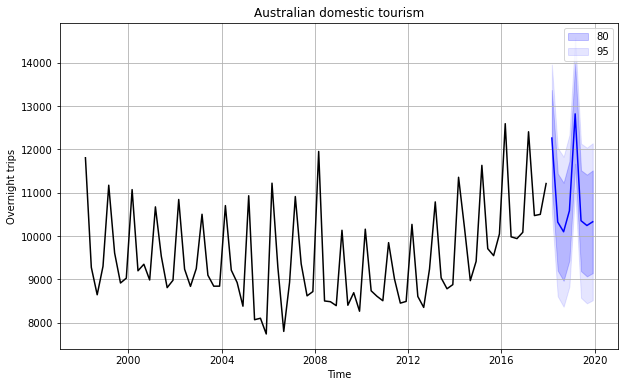

In [ ]:
fit_tour3 = ETSModel(tour_series, error='add', trend=None, seasonal='add').fit()
forecast_tour3 = fit_tour3.forecast(8)

ci = fit_tour3.get_prediction(start = forecast_tour3.index[0], end = forecast_tour3.index[-1])
lower_ci80 = ci.pred_int(alpha=0.2).iloc[:,0]
upper_ci80 = ci.pred_int(alpha=0.2).iloc[:,1]
lower_ci95 = ci.pred_int(alpha=0.05).iloc[:,0]
upper_ci95 = ci.pred_int(alpha=0.05).iloc[:,1]

plt.figure(figsize=(10, 6))
plt.plot(tour_series, color='black')
plt.plot(forecast_tour3.index, forecast_tour3.values, color='b')
plt.fill_between(forecast_tour3.index, lower_ci80, upper_ci80, label='80', color='b', alpha=.2)
plt.fill_between(forecast_tour3.index, lower_ci95, upper_ci95, label='95', color='b', alpha=.1)
plt.xlabel('Time')
plt.ylabel('Overnight trips')
plt.title('Australian domestic tourism')
plt.grid(True)
plt.legend()
plt.show()

# C. Prophet 모델

### Prophet 모델
- Prophet 모델
    - 페이스북에서 개발된 Prophet(S. J. Taylor & Letham, 2018)은 원래 주간 및 연간 계절성과 휴일 효과를 포함하여 일별 데이터를 예측하기 위해 소개되었다.
$$y(t)=g(t)+s(t)+h(t)+\epsilon_t$$
        - $g(t)$는 부분-선형 추세(혹은 성장 항)을 설명한다: 부분-선형 추세의 요점(혹은 변화점)은 명시적으로 지정되지 않은 경우 자동으로 선택된다.선택적으로 로지스틱 함수를 사용하여 추세의 상한을 설정할 수 있다.(부분-선형 추세: piecewise-linear trend, 요점: knot)
        - $s(t)$는 다양한 계절성 패턴을 설명한다: 계절성 성분은 관련 주기의 푸리에 항으로 구성된다. 기본적으로 연간 계절성에는 10차까지 사용되고 주간 계절성에는 3차까지 사용된다.
        - $h(t)$는 휴일 효과를 포착한다: 휴일 효과는 단순한 더미 변수로 추가된다.
        - $\epsilon_t$는 백색 잡음 오차 항이다. 모델은 변화점 및 기타 모델 특성의 자동 선택을 허용하기 위해 베이지안 접근법을 사용하여 추정한다. 적합이 매우 빠르다.
    - 강력한 계절성을 갖고 있고 여러 계절이 나타나는 과거 데이터가 있는 시계열에 가장 잘 작동한다.
    - 유연성: 가중 기간의 계절성. ARIMA 모델과 달리 측정값이 균일하게 분포할 필요가 없으며, 결측값을 보간할 필요가 없다.
    - 매개변수가 해석하기 쉽다.
- 추세 $g(t)$
    - 비선형, 포화 성장: 운반 용량 $C$(예: 인터넷 사용자 수)에서 포화된다.
        - $g(t)=\frac{C}{1+\exp{(-k(t-m))}}$, $C$는 운반 용량, $k$는 성장률, $m$는 offset 매개변수
    - 변화점을 포함한 선형 추세: 고정된 성장률
        - $g(t)=(k+a(t)^T\delta)t+(m+a(t)^T\gamma)$
- 계절성 $s(t)$
    - 주기적 효과의 유연한 모델을 제공하기 위해 푸리에 급수를 사용한다.
    $$s(t)=\sum_{n=1}^{N}(a_n\cos{(\frac{2\pi nt}{P})}+b_n\sin{(\frac{2\pi nt}{P})})=X(t)\beta, (N: 푸리에 차수)$$
        - 예: 연간 데이터는 $P=365.25$, 주간 데이터는 $P=7$
        - N개의 푸리에 항을 모델링하는 데 2N개의 매개변수를 추정해야 한다. 푸리에 항의 수를 증가시키면 계절성이 더 빠르게 변하는 주기를 적합시킬 수 있지만, 과적합으로 이어질 수도 있다.
        - $\beta=[a_1,b_1,...,a_n,b_n]^T$, $\beta\sim N(0,\sigma^2)$
        - $X(t)=[\cos{(\frac{2\pi(1)t}{365.25})},\sin{(\frac{2\pi(1)t}{365.25})},...,\cos{(\frac{2\pi(10)t}{365.25})},\sin{(\frac{2\pi(10)t}{365.25})}]$
        - 가산 계절성: 시계열 = 추세 + 계절성 + 오차
        - 승산 계절성: 시계열 = 추세 * 계절성 * 오차

In [20]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv3ialzav/vj84x6k9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv3ialzav/35rmnm7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85315', 'data', 'file=/tmp/tmpv3ialzav/vj84x6k9.json', 'init=/tmp/tmpv3ialzav/35rmnm7a.json', 'output', 'file=/tmp/tmpv3ialzav/prophet_modelflta0247/prophet_model-20240209100410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:04:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:04:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


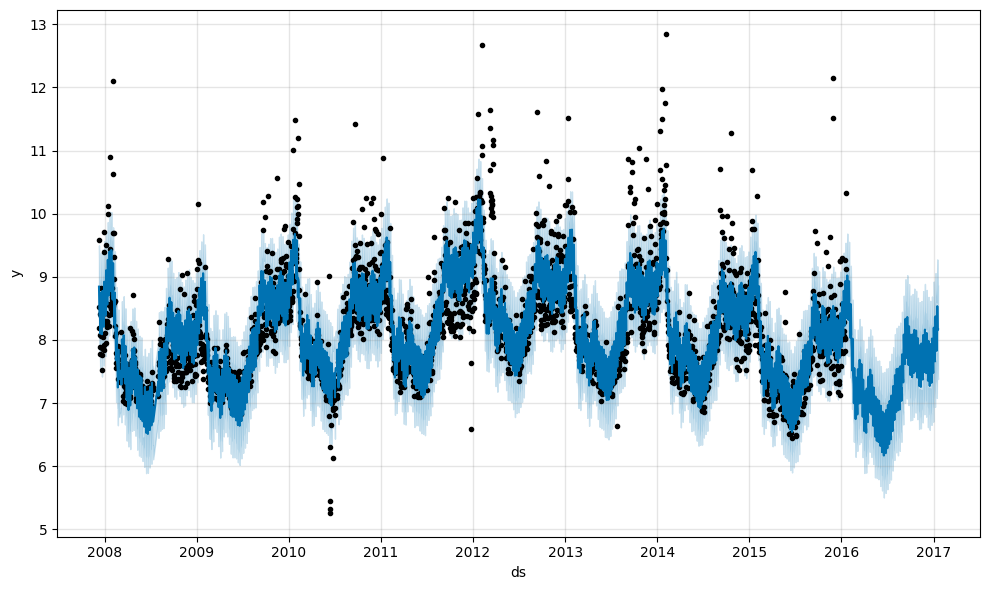

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
pro = Prophet(changepoint_prior_scale=0.05)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig1 = pro.plot(forecast)

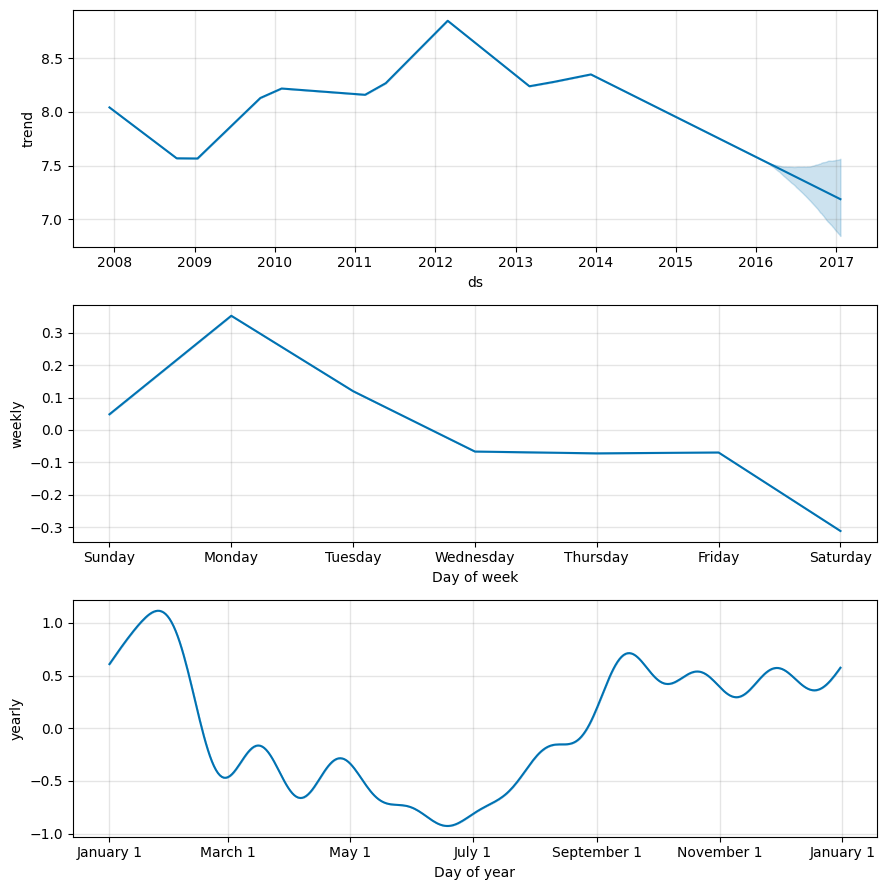

In [ ]:
fig2 = pro.plot_components(forecast)

### Prophet 모델: 추세

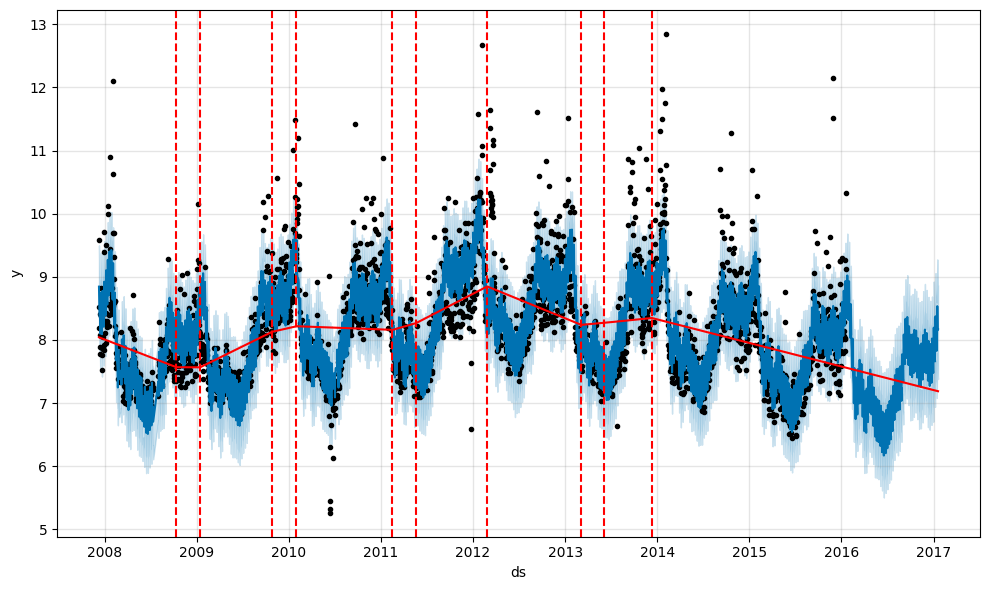

In [ ]:
fig = pro.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/c8c247r6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/0lu5q4g_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96867', 'data', 'file=/tmp/tmplefwxnqm/c8c247r6.json', 'init=/tmp/tmplefwxnqm/0lu5q4g_.json', 'output', 'file=/tmp/tmplefwxnqm/prophet_model0x70w243/prophet_model-20240208154542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:45:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:45:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


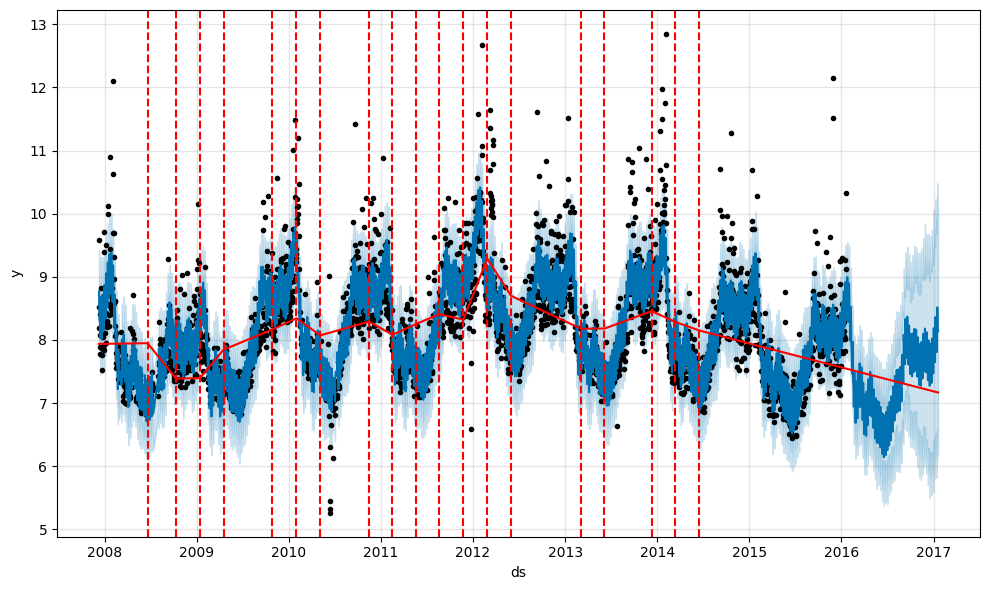

In [ ]:
pro = Prophet(changepoint_prior_scale=0.3)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro, forecast)

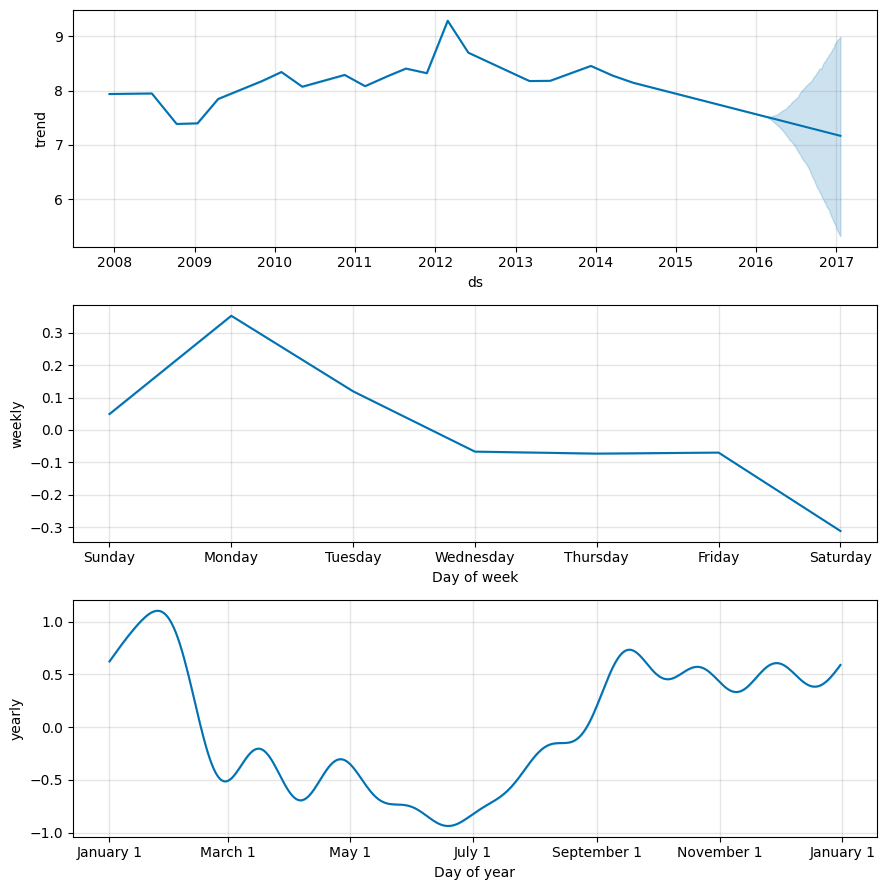

In [ ]:
fig2 = pro.plot_components(forecast)

### Prophet 모델: 계절성

DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/v28vakm7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/xnpzgu95.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67562', 'data', 'file=/tmp/tmplefwxnqm/v28vakm7.json', 'init=/tmp/tmplefwxnqm/xnpzgu95.json', 'output', 'file=/tmp/tmplefwxnqm/prophet_modelzsbobcj4/prophet_model-20240208155216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:52:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:52:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


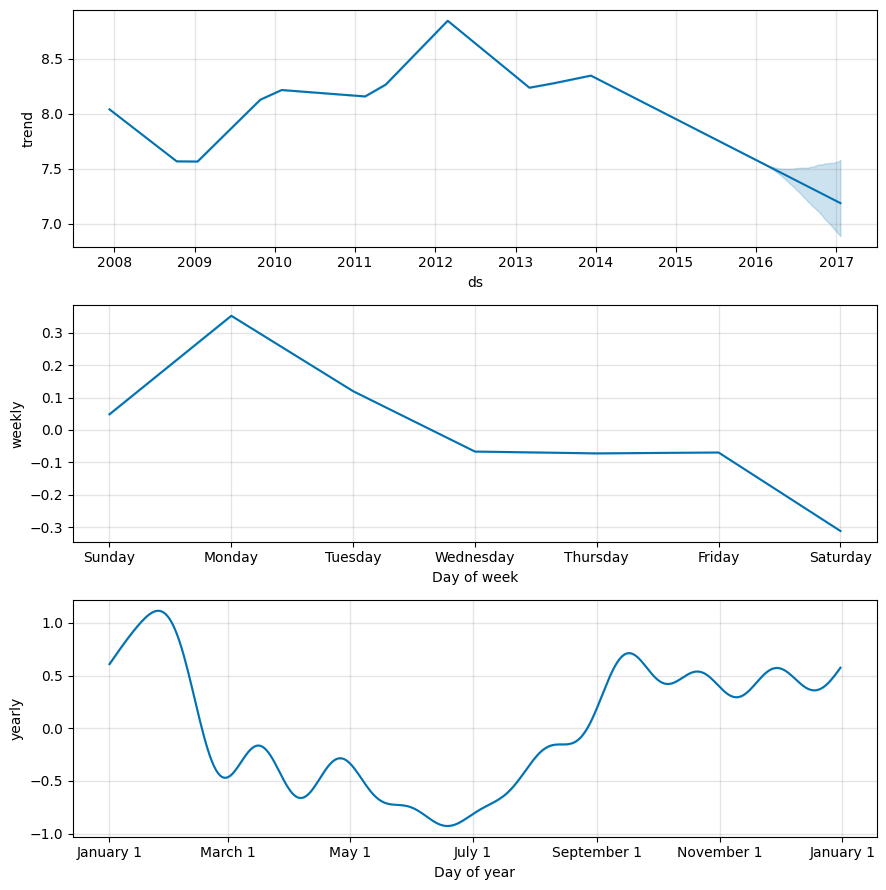

In [ ]:
pro = Prophet(
    changepoint_prior_scale=0.05,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot_components(forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/7q0s7j3z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/by4gofj1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42842', 'data', 'file=/tmp/tmplefwxnqm/7q0s7j3z.json', 'init=/tmp/tmplefwxnqm/by4gofj1.json', 'output', 'file=/tmp/tmplefwxnqm/prophet_model_rifdx3x/prophet_model-20240208155238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:52:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:52:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


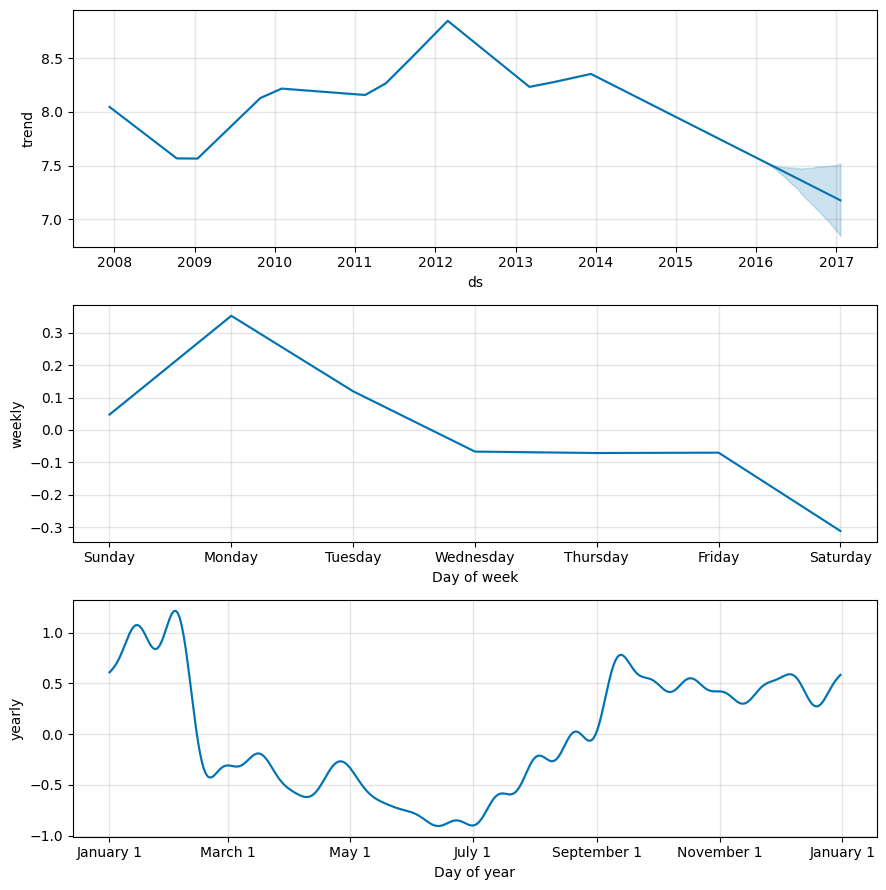

In [ ]:
pro = Prophet(
    changepoint_prior_scale=0.05,
    yearly_seasonality=20,
    daily_seasonality=False
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot_components(forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/1ggtmi1u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/fcu6xgy3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27282', 'data', 'file=/tmp/tmplefwxnqm/1ggtmi1u.json', 'init=/tmp/tmplefwxnqm/fcu6xgy3.json', 'output', 'file=/tmp/tmplefwxnqm/prophet_model90prgq4_/prophet_model-20240208160654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:06:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:06:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


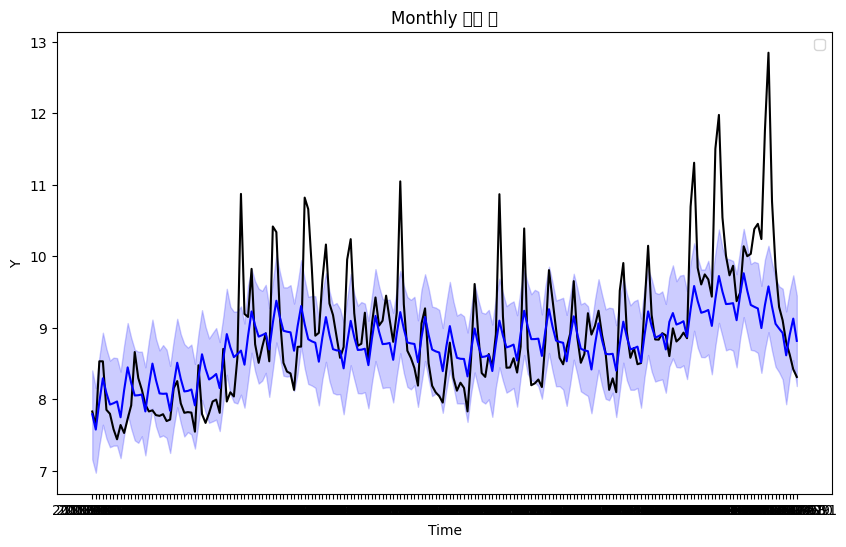

In [ ]:
pro = Prophet(
    changepoint_prior_scale=0.05,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[2000:2200]
plt.figure(figsize=(10, 6))
plt.plot(df[2000:2200].ds, df[2000:2200].y, color='black')
plt.plot(df[2000:2200].ds, tmp.yhat, color='b')
plt.fill_between(df[2000:2200].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Monthly 추가 전')
plt.legend()
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/xter9q0d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/ya9s6kqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77512', 'data', 'file=/tmp/tmplefwxnqm/xter9q0d.json', 'init=/tmp/tmplefwxnqm/ya9s6kqc.json', 'output', 'file=/tmp/tmplefwxnqm/prophet_modelvo1lxgab/prophet_model-20240208160746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:07:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:07:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


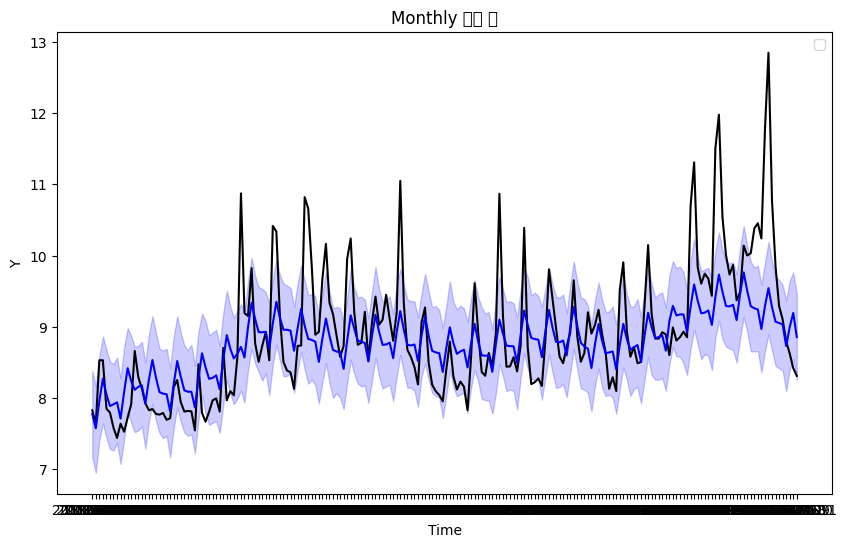

In [ ]:
pro = Prophet(
    changepoint_prior_scale=0.05,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.add_seasonality(name='monthly', period=30.5, fourier_order=5)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[2000:2200]
plt.figure(figsize=(10, 6))
plt.plot(df[2000:2200].ds, df[2000:2200].y, color='black')
plt.plot(df[2000:2200].ds, tmp.yhat, color='b')
plt.fill_between(df[2000:2200].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Monthly 추가 후')
plt.legend()
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/0lt3_bmq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/jrg8a4yz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89230', 'data', 'file=/tmp/tmplefwxnqm/0lt3_bmq.json', 'init=/tmp/tmplefwxnqm/jrg8a4yz.json', 'output', 'file=/tmp/tmplefwxnqm/prophet_model7b3hcvdy/prophet_model-20240208161649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:16:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:16:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


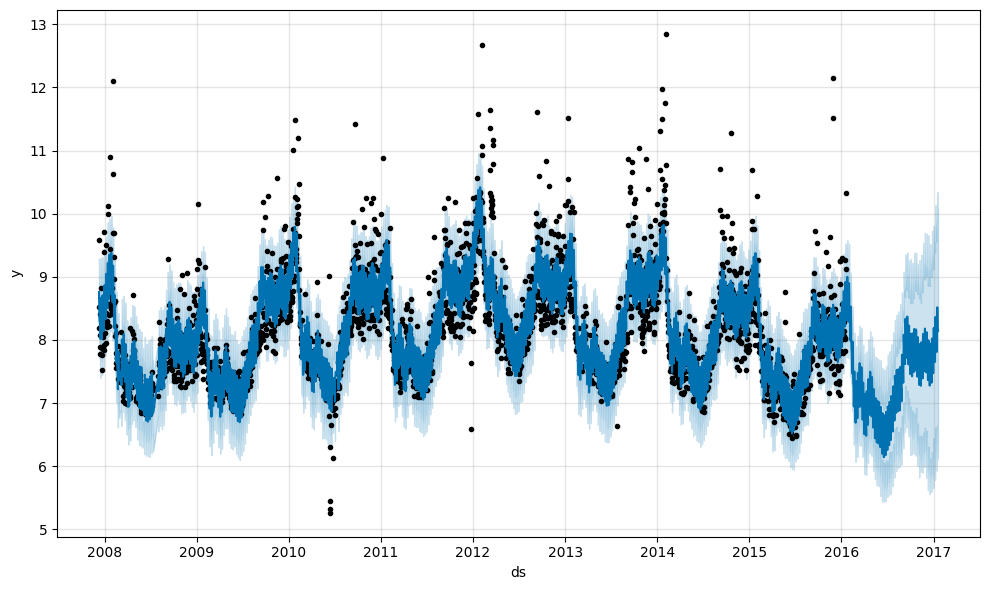

In [ ]:
pro = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot(forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/o6a7iis5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/cri277su.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20947', 'data', 'file=/tmp/tmplefwxnqm/o6a7iis5.json', 'init=/tmp/tmplefwxnqm/cri277su.json', 'output', 'file=/tmp/tmplefwxnqm/prophet_modelc42sxt1q/prophet_model-20240208161652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:16:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:16:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


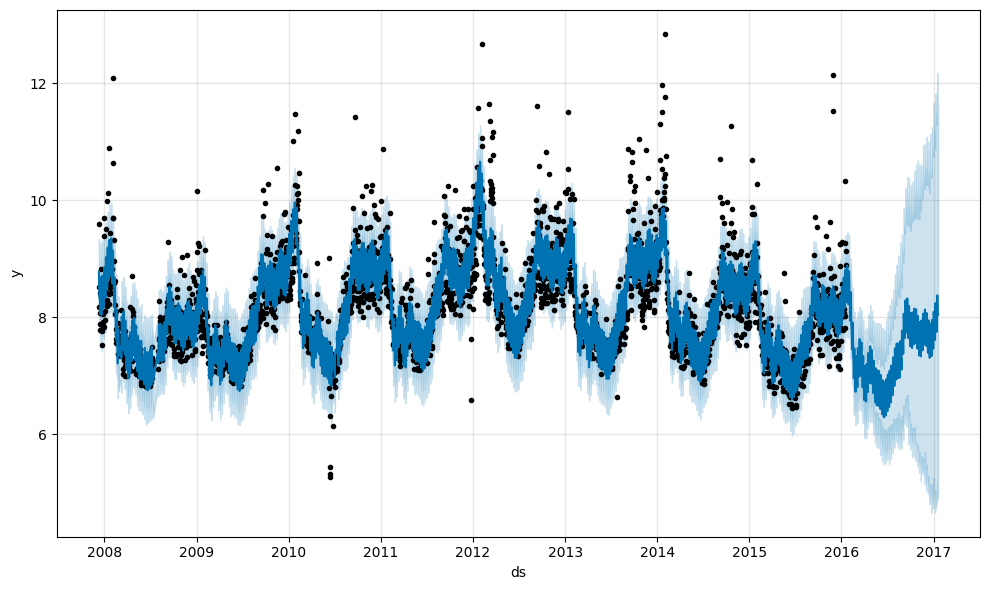

In [ ]:
pro = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot(forecast)

### Prophet 모델: 휴일 효과
각 국가의 휴일은 Python의 holidays 패키지에서 제공된다. 사용 가능한 국가 목록 및 사용할 국가 이름은 해당 페이지에서 확인할 수 있다: https://github.com/vacanza/python-holidays/

DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/yt25a66w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/qfc1nqod.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41100', 'data', 'file=/tmp/tmplefwxnqm/yt25a66w.json', 'init=/tmp/tmplefwxnqm/qfc1nqod.json', 'output', 'file=/tmp/tmplefwxnqm/prophet_modelyhdhf6x2/prophet_model-20240208162055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


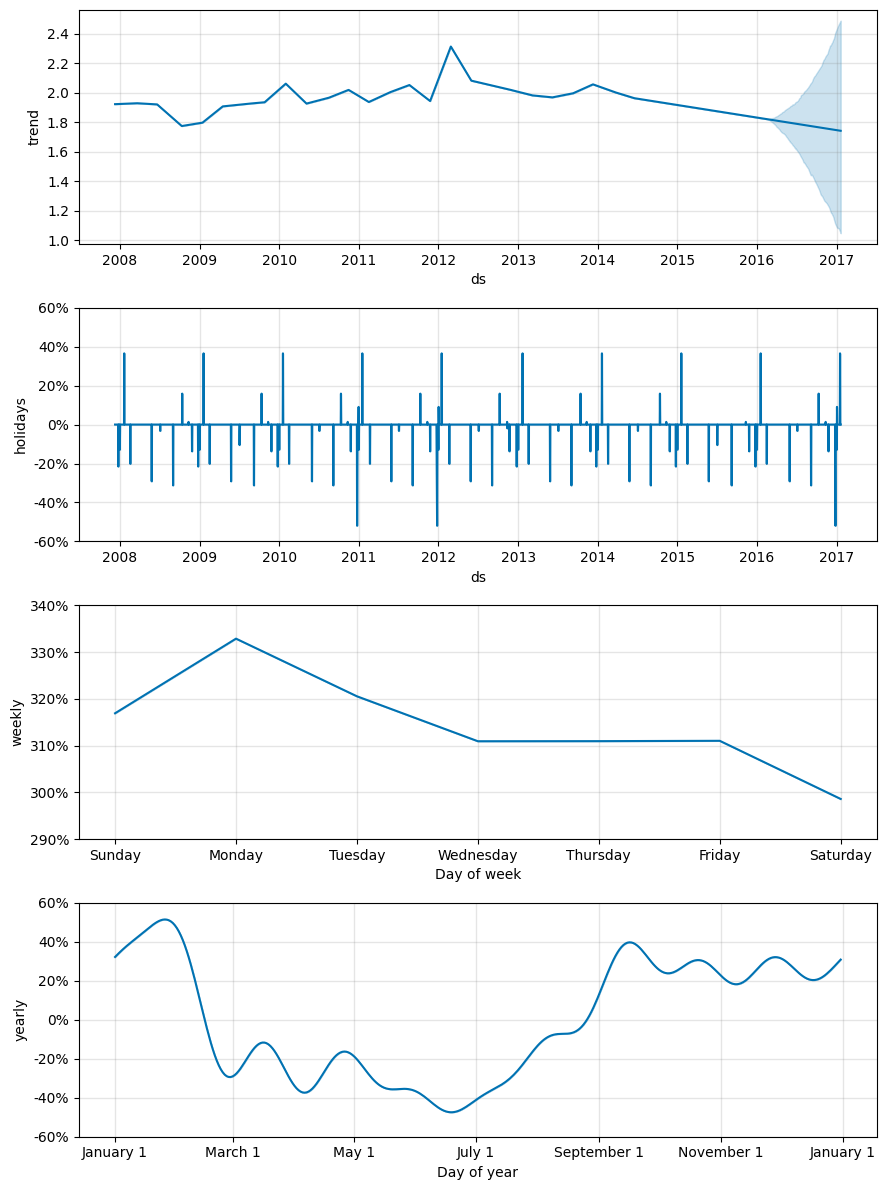

In [ ]:
pro = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.add_country_holidays(country_name='US')
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot_components(forecast)

### Prophet 모델 (이어서)
- 휴일과 이벤트
    - $D_i$는 해당 휴일의 과거 및 미래 날짜의 집합이다.
    - 각 휴일에 매개변수 $\mathbf{\kappa_i}$를 할당한다.
    - $Z(t)=[\mathbf{1}(t\in D_1),...,\mathbf{1}(t\in D_L)]$
    - $h(t)=Z(t)\mathbf{\kappa}$, $\mathbf{\kappa}\sim N(0, v^2)$

DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/mh6s8l2x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/5jog7ela.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1536', 'data', 'file=/tmp/tmplefwxnqm/mh6s8l2x.json', 'init=/tmp/tmplefwxnqm/5jog7ela.json', 'output', 'file=/tmp/tmplefwxnqm/prophet_modelgim3fjlq/prophet_model-20240208162341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


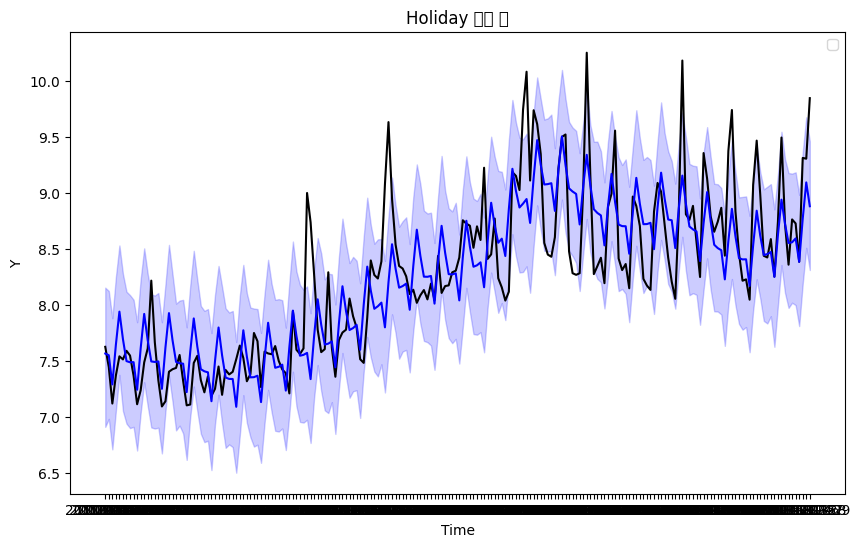

In [ ]:
pro = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[1200:1400]
plt.figure(figsize=(10, 6))
plt.plot(df[1200:1400].ds, df[1200:1400].y, color='black')
plt.plot(df[1200:1400].ds, tmp.yhat, color='b')
plt.fill_between(df[1200:1400].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Holiday 추가 전')
plt.legend()
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/4sxhl4uy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/w6hmtgl8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6988', 'data', 'file=/tmp/tmplefwxnqm/4sxhl4uy.json', 'init=/tmp/tmplefwxnqm/w6hmtgl8.json', 'output', 'file=/tmp/tmplefwxnqm/prophet_modelr5sq_jul/prophet_model-20240208162346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


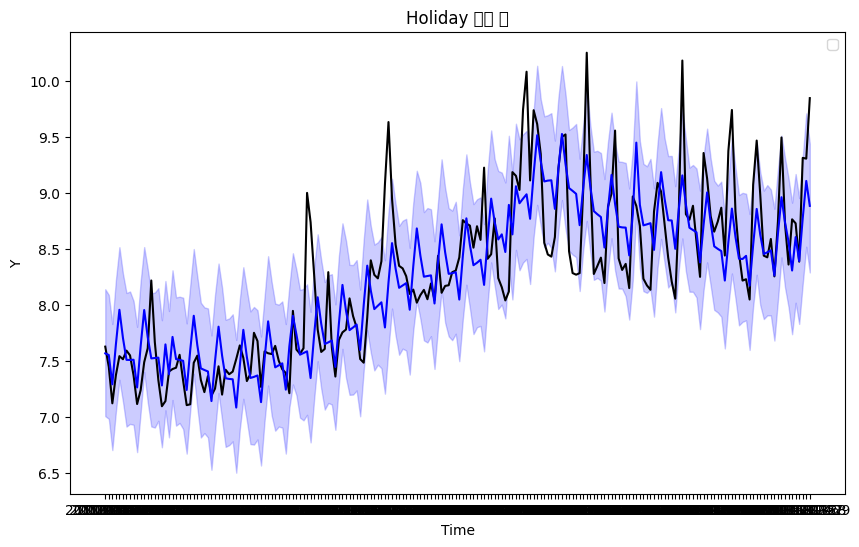

In [ ]:
pro = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.add_country_holidays(country_name='US')
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[1200:1400]
plt.figure(figsize=(10, 6))
plt.plot(df[1200:1400].ds, df[1200:1400].y, color='black')
plt.plot(df[1200:1400].ds, tmp.yhat, color='b')
plt.fill_between(df[1200:1400].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Holiday 추가 후')
plt.legend()
plt.show()

### 예시: 30분 전기 수요
- 마지막에 납득하기 어려운 하향 추세가 잡힌다.
- 잔차에 상당한 자기상관이 관측 된다.

In [ ]:
elec = pd.read_csv('vic_elec.csv')
elec['ds'] = elec['Time']
elec['y'] = elec['Demand']
elec = elec[['ds','y']]

pro = Prophet(
    weekly_seasonality=5,
    yearly_seasonality=3,
    daily_seasonality=10,
)
pro.fit(elec)

DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/76_v9iit.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefwxnqm/ixkm9pt1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33680', 'data', 'file=/tmp/tmplefwxnqm/76_v9iit.json', 'init=/tmp/tmplefwxnqm/ixkm9pt1.json', 'output', 'file=/tmp/tmplefwxnqm/prophet_model1dbx9bg3/prophet_model-20240208163740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:38:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


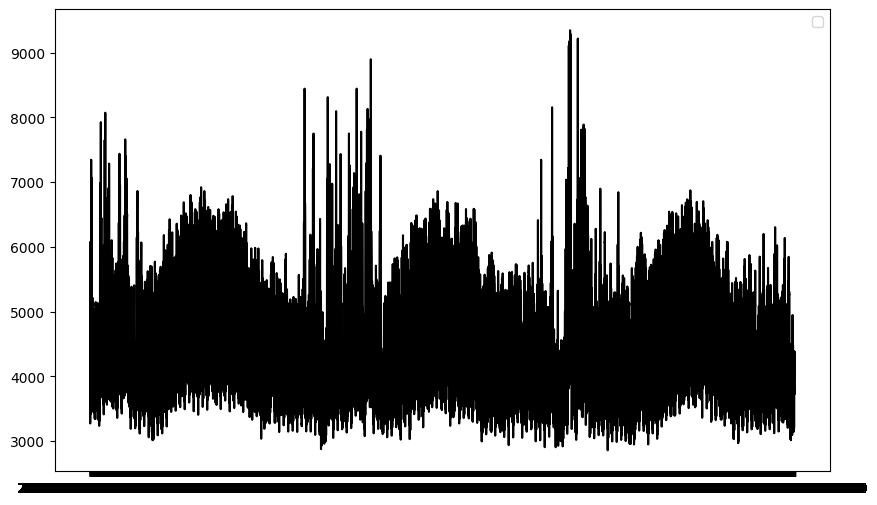

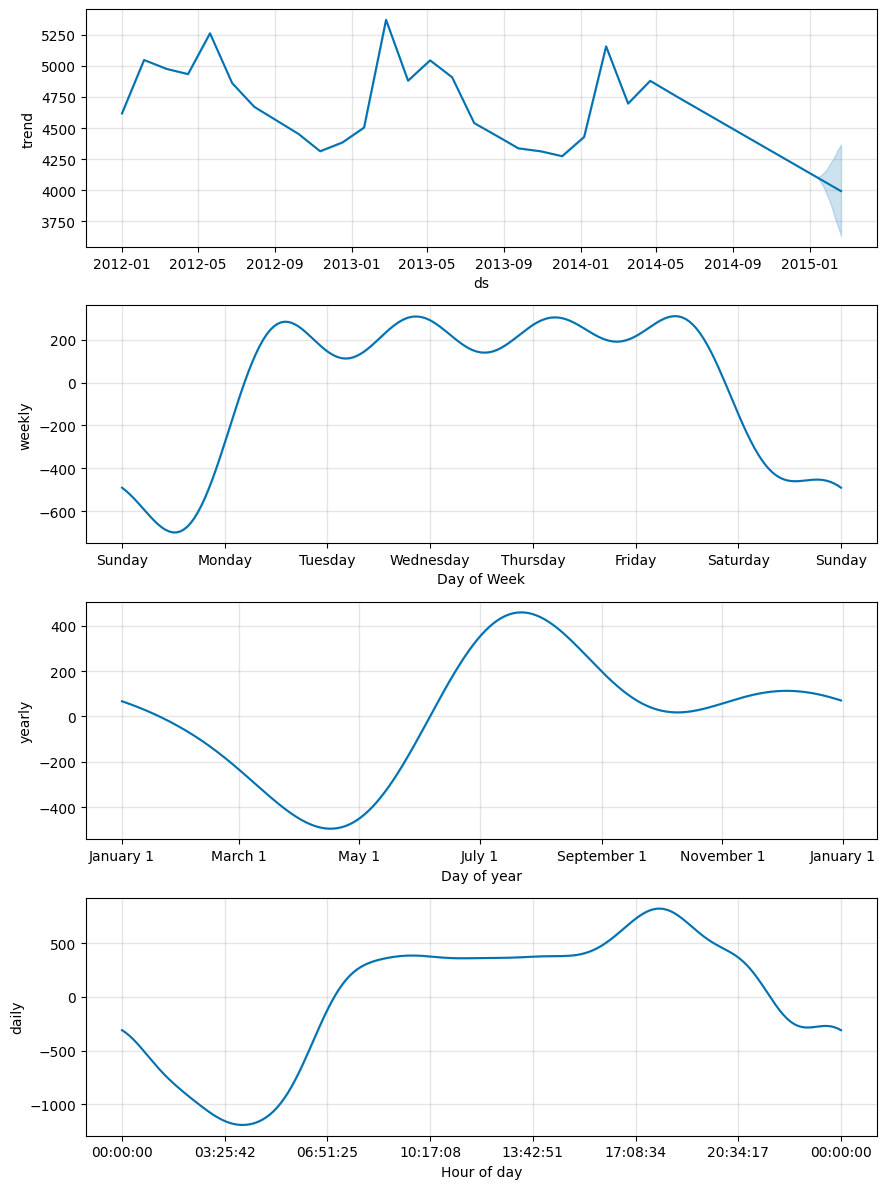

In [ ]:
future = pro.make_future_dataframe(periods=50)
forecast = pro.predict(future)

plt.figure(figsize=(10, 6))
plt.plot(elec['ds'], elec['y'], color='black')
plt.legend()
plt.show()
fig = pro.plot_components(forecast)

### 비교: ARIMA, ETS, Prophet
Prophet은 추정하는 데 훨씬 빠르고 완전히 자동화되는 장점이 있다. 그러나 대안적 접근 방법보다 예측 정확도가 대체적으로 떨어진다.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpv3ialzav/zqh13qzg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv3ialzav/1zv0l4au.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17477', 'data', 'file=/tmp/tmpv3ialzav/zqh13qzg.json', 'init=/tmp/tmpv3ialzav/1zv0l4au.json', 'output', 'file=/tmp/tmpv3ialzav/prophet_model909vsqs0/prophet_model-20240209114303.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:43:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:43:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


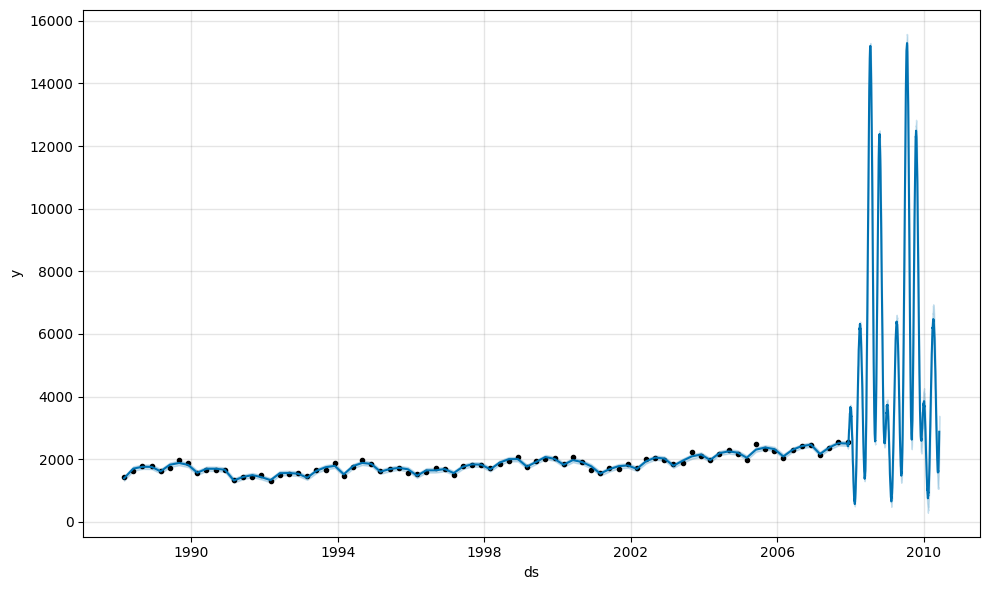

In [27]:
aus_prod = pd.read_csv('aus_production.csv')
aus_prod['y'] = aus_prod['Cement']
#aus_prod['ds'] = pd.Series([i for i in range(1,aus_prod.shape[0]+1)])
aus_prod['ds'] = pd.date_range(start='2/3/1956',periods=218, freq='3MS')
aus_prod = aus_prod[['y', 'ds']]
aus_prod = aus_prod[aus_prod['ds']>='1988-01-01']
df = aus_prod[aus_prod['ds']<='2007-12-31']

pro = Prophet(
    weekly_seasonality=10,
    yearly_seasonality=5,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.add_seasonality(name='year', period=4, fourier_order=5, mode='multiplicative')
pro.fit(df)

future = pro.make_future_dataframe(periods=914)
forecast = pro.predict(future)
fig = pro.plot(forecast)

In [16]:
df

,y,ds
128,1418,1988-03-01
129,1625,1988-06-01
130,1770,1988-09-01
131,1791,1988-12-01
132,1621,1989-03-01
...,...,...
203,2451,2006-12-01
204,2140,2007-03-01
205,2362,2007-06-01
206,2536,2007-09-01
